In [8]:
# read a file that looks like this:
# # Extracted from test_10.ms.
# # wavelength[m] = 1.0
# # Columns:      u[m]    v[m]    Re(V)[Jy]       Im(V)[Jy]       weight
# -1.000000e+01   0.000000e+00    -9.866357e-04   3.139526e-02    2.000000e+00
# -2.000000e+01   0.000000e+00    -3.942639e-03   6.266662e-02    2.000000e+00
# -3.000000e+01   0.000000e+00    -8.856386e-03   9.369066e-02    2.000000e+00

import numpy as np
import pandas as pd
path = "test_10_uvtable.txt"
df = pd.read_csv(path, delim_whitespace=True, comment="#", names=["u", "v", "Re(V)", "Im(V)", "weight"])
df['u'] = np.abs(df['u'])
df['v'] = np.abs(df['v'])
display(df)

/tmp/ipykernel_971322/2848616162.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, comment="#", names=["u", "v", "Re(V)", "Im(V)", "weight"])


,u,v,Re(V),Im(V),weight
0,10.0,0.0,-0.000987,0.031395,2.0
1,20.0,0.0,-0.003943,0.062667,2.0
2,30.0,0.0,-0.008856,0.093691,2.0
3,40.0,0.0,-0.015708,0.124345,2.0
4,50.0,0.0,-0.024472,0.154508,2.0
...,...,...,...,...,...
32380,0.0,20.0,0.000000,0.000000,2.0
32381,0.0,30.0,0.000000,0.000000,2.0
32382,0.0,10.0,0.000000,0.000000,2.0
32383,0.0,20.0,0.000000,0.000000,2.0


Grid spacing in u: 10.0, gridsize: 128


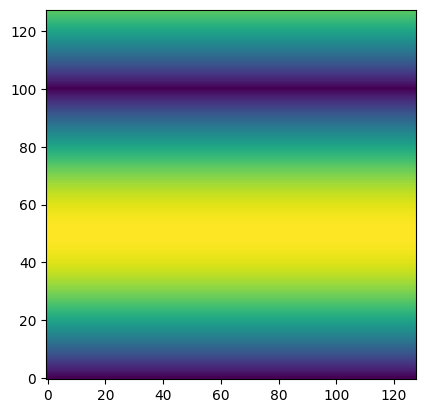

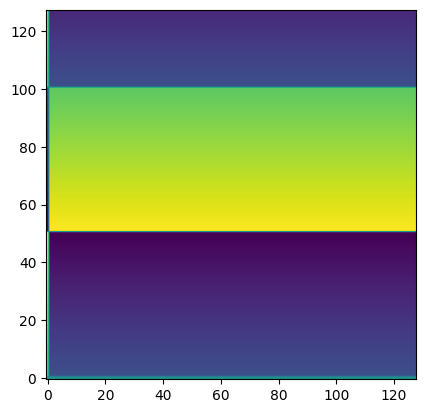

In [ ]:
unique_u = np.unique(df['u'])
u_spacing = np.diff(unique_u).min()
u_gridsize = int((unique_u.max() - unique_u.min()) / u_spacing + 1)
print(f"Grid spacing in u: {u_spacing}, gridsize: {u_gridsize}")
# make an empty grid of complex numbers
grid = np.zeros((u_gridsize, u_gridsize), dtype=complex)
# fill the grid with the values from the dataframe
for i, row in df.iterrows():
    u_index = int((row['u'] - unique_u.min()) / u_spacing)
    v_index = int((row['v'] - unique_u.min()) / u_spacing)
    grid[u_index, v_index] = row['Re(V)'] + 1j * row['Im(V)']

# plot the grid
import matplotlib.pyplot as plt
plt.imshow(np.abs(grid), origin='lower')
plt.show()
plt.imshow(np.angle(grid * 1j), origin='lower')
plt.show()